# Part II - Analysis of San Francisco Bay Ford GoBike System
## by Matthew Olushola Odebunmi

## Investigation Overview


> **I am interested in the duration of the trips**
> we can see the most prominnent Start Staion Name and End Station name

> 90.53% that undergo the trips were Subscriber while only 9.47% were Customer

> The most active day for the start trip is Thurday, follow by Tuesday and Friday

> The distribution of the start time chart show 2 peak of 8 hour and 17 hour


## Dataset Overview

### The Dataset contains 16 Features

> 1. Time duration in seconds
> 2. Start time and date
> 3. End time and date
> 4. Start Station ID
> 5. Start Station Name
> 6. Start Station Latitude
> 7. Start Station Longitude
> 8. End Station ID
> 9. End Station Name
> 10. End Station Latitude
> 11. End station Longitude
> 12. Bike ID
> 13. User Type
> 14. Member Birth year
> 15. Member Gender
> 16. Bike Share for all Trip
> The dataset has 174952 entries

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#check for null entries
fordgobike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [4]:
#Drop the null entries
fordgobike.dropna(inplace=True)
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [5]:
# Convert start_time and end_time to datetime
from datetime import time

fordgobike['start_time'] = pd.to_datetime(fordgobike['start_time'])
fordgobike['end_time'] = pd.to_datetime(fordgobike['end_time'])

In [6]:
# Convert Memember Birth Year to Integer
fordgobike['member_birth_year'] = fordgobike['member_birth_year'].astype(int)

In [7]:
#Create  new variables in the dataframe
fordgobike['start_day'] = fordgobike['start_time'].dt.day_name()
fordgobike['start_hour'] = fordgobike['start_time'].dt.hour

In [8]:
# Drop some features that are not needed fo the analysis
drop_list = ['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude',
            'end_station_longitude','bike_id']

fordgobike.drop(drop_list, axis=1, inplace=True)

In [9]:
#set the default color
default_color = sb.color_palette()[0]

In [10]:
def myCountPlot(df, xVar,color=default_color,order=None):
    
    # plot dimensions 
    plt.figure(figsize=[14,6])
    #plot
    sb.countplot(data=df, x=xVar,edgecolor='black', color=color,order=order)
    xVar=xVar.replace("_", " ") #replace _ with space
    # Add title and format
    plt.title(f'''Distribution of {xVar}'''.title(), fontsize=14, weight="bold")
    # Add xlabel and format it
    plt.xlabel(xVar.title(), fontsize = 10, weight = "bold")
    # Add ylabel and format it
    plt.ylabel('Frequency'.title(), fontsize =10, weight ="bold" )

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Start Station Name For The Trip

> The Most Popular 15 Start Station Name

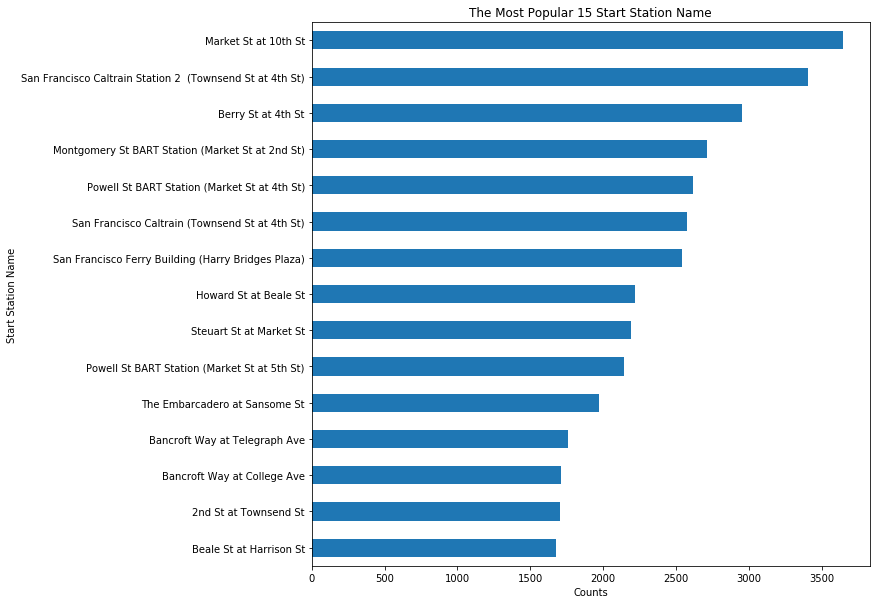

In [11]:
# Most Popular Start Station Name

plt.figure(figsize = [10,10])
default_color = sb.color_palette()[0]
fordgobike.start_station_name.value_counts(ascending=True).tail(15).plot.barh(color=default_color);
plt.ylabel('Start Station Name')
plt.xlabel('Counts')
plt.title('The Most Popular 15 Start Station Name')

plt.show()

## End Station Name For The Trip

> The Most Popular 15 End Station Name

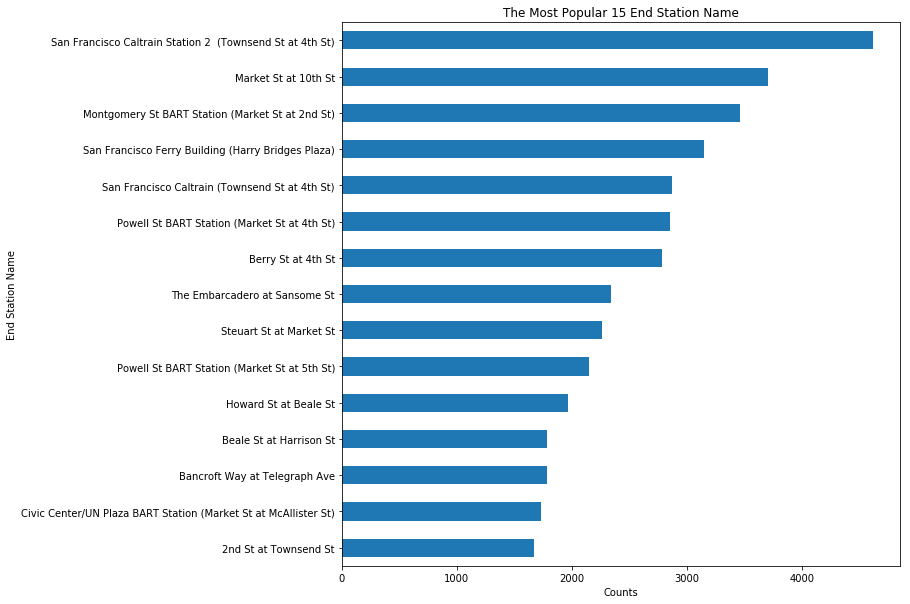

In [12]:
# most Popular End Station Name
plt.figure(figsize = [10,10])
default_color = sb.color_palette()[0]
fordgobike.end_station_name.value_counts(ascending=True).tail(15).plot.barh(color=default_color);
plt.ylabel('End Station Name')
plt.xlabel('Counts')
plt.title('The Most Popular 15 End Station Name')

plt.show()

## Distribution of Biker

> 90.53% that undergo the trips were Subscriber while only 9.47% were Customer

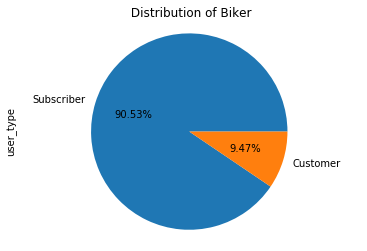

In [13]:
# Bike User Comparison
fig, ax = figsize = [10,10]
fordgobike.user_type.value_counts().plot.pie(autopct='%1.2f%%')
plt.axis('equal');
plt.title(' Distribution of Biker');

## Distribution of Start Day of the Biker

> The most active day to the start trip is Thurday

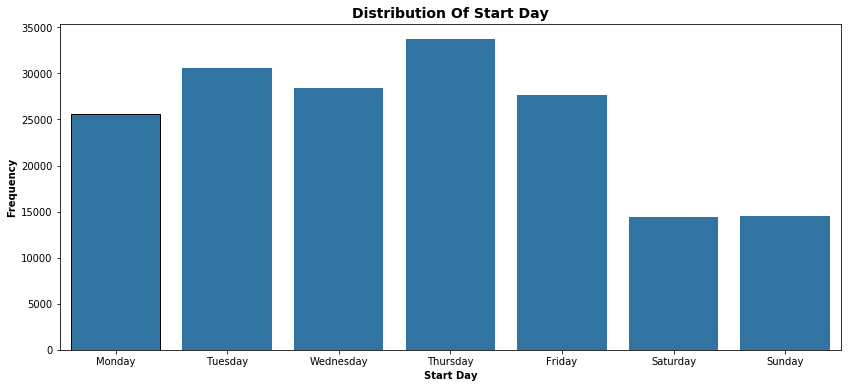

In [14]:
# Distribution of Users across days of the week
day_of_wk = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
myCountPlot(fordgobike, 'start_day', order=day_of_wk)

## Distribution of Start Hour Rate for the Trip

> The distribution of the start time chart show 2 peak of 8 hour and 17 hour

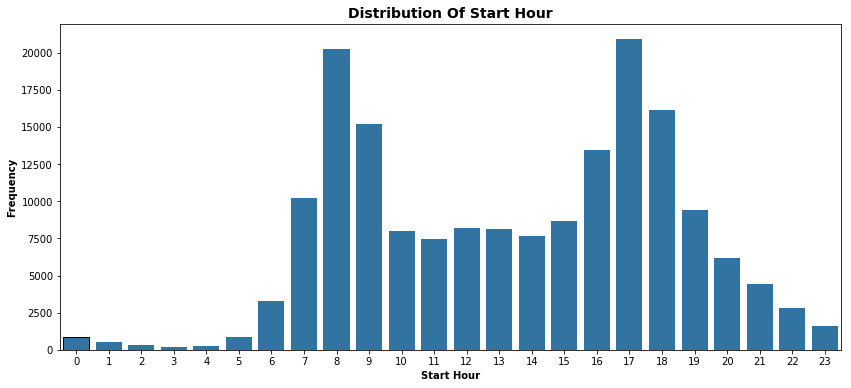

In [15]:
# Distribution of Start hour rate for the trip
myCountPlot(fordgobike,'start_hour')

## Relationship Duration, Gender and User Type

> > Male User Subscriber have shorter Trip

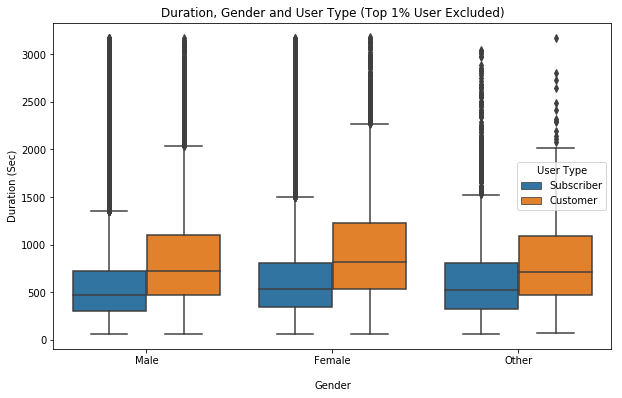

In [16]:
plt.figure(figsize=[10,6])
sb.boxplot(data=fordgobike.query('duration_sec<duration_sec.quantile(0.99)'),
           x='member_gender',y='duration_sec',hue='user_type')
plt.xlabel('Gender', labelpad=15)
plt.ylabel('Duration (Sec)')
plt.title('Duration, Gender and User Type (Top 1% User Excluded)')
plt.legend(title='User Type');

## Member Birth Year , Gender and User Type

> Both Male Customers and Subscribers Users has similar Age range that took the Trip compare to Female Users and Others 

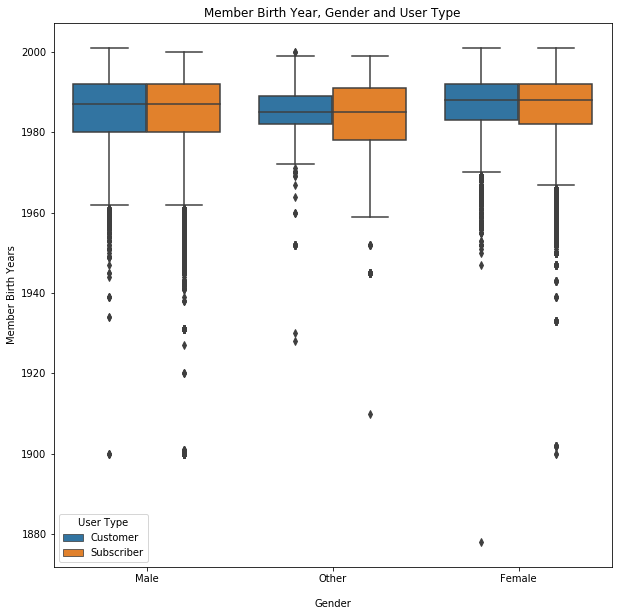

In [17]:
plt.figure(figsize=[10,10])
sb.boxplot(data=fordgobike,x='member_gender',y='member_birth_year',hue='user_type')
plt.xlabel('Gender', labelpad=15)
plt.ylabel('Member Birth Years')
plt.title('Member Birth Year, Gender and User Type')
plt.legend(title='User Type');

## Relationships of Duration, Gender and Day in 2D visualization

> 2D visualization showing distribution of Gender across the days of the week over the duration of trip in sec

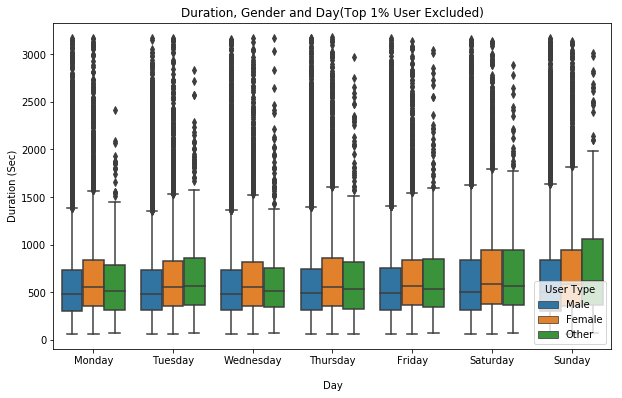

In [18]:
plt.figure(figsize=[10,6])
sb.boxplot(data=fordgobike.query('duration_sec<duration_sec.quantile(0.99)'), order=day_of_wk,
           x='start_day',y='duration_sec',hue='member_gender')
plt.xlabel('Day', labelpad=15)
plt.ylabel('Duration (Sec)')
plt.title('Duration, Gender and Day(Top 1% User Excluded)')
plt.legend(title='User Type');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
!jupyter nbconvert Part_II_notebook.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_notebook.ipynb to slides
[NbConvertApp] Writing 517808 bytes to Part_II_notebook.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_notebook.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found


In [ ]:
# Use this command if you are running this file in local
#jupyter nbconvert --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
